<div class="alert alert-info">
В блоках голубого цвета указаны комментарии преподавателя
    </div>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from statsmodels.stats.weightstats import ztest

In [2]:
# В переменной data_path указан путь до данных
data_path = "/home/elvira/BLASTIM_ML_ON_PYTHON/day_09"
expression_data = pd.read_csv(f"{data_path}/immune_cells_data.csv", index_col=0)
expression_data.head()

,TMCC1,RANBP3,GABRG3,ARRDC5,LRP3,TIMM23,TBPL1,BIRC8,TTC28,C19orf66,...,MAGEA6,IL4I1,LCN12,SMG6,C1orf100,WDR75,ZBTB26,SPTY2D1,PLEKHA2,Cell_type
0,33.888550,38.384340,0.044721,1.385159,11.341853,105.193306,26.463990,0.000000,1.537873,27.645407,...,21.332443,1.397932,0.000000,23.136585,0.001902,60.218548,6.307399,9.577274,44.026940,B_cell
1,16.497124,35.054090,0.314645,4.329797,8.649321,50.577618,16.684614,0.000000,1.796609,13.715611,...,1.199440,159.147130,0.259244,18.986986,0.310971,25.818224,4.193348,14.181196,35.779896,B_cell
2,5.449933,31.783958,0.002949,2.137536,1.750892,109.201050,35.265984,0.011501,0.878889,19.361662,...,0.002924,25.256378,0.000000,32.941895,0.000000,99.555990,8.323141,29.321960,30.816538,B_cell
3,33.362240,56.147026,0.037295,1.604904,6.807299,100.141620,25.446817,0.000000,2.502661,12.745437,...,0.000000,14.509516,0.063003,19.036896,0.000000,49.394980,4.655794,17.683067,47.143270,B_cell
4,50.188510,30.165264,0.039678,1.501439,1.619954,46.916790,28.053373,0.018181,1.165164,30.318027,...,0.033807,93.681190,0.031816,19.094831,0.000000,20.201437,6.935232,20.769829,53.935143,B_cell


In [3]:
b_cells_expression_data = expression_data.query("Cell_type == 'B_cell'").drop("Cell_type", axis=1)
nk_cells_expression_data = expression_data.query("Cell_type == 'NK_cell'").drop("Cell_type", axis=1)

<div class="alert alert-info">
      В этом задании мы будем работать с данными об экспрессии генов в друх клеточных типах: в B-клетках и в NK-клетках. Выясним, средняя экспрессия каких генов значимо различается в этих клеточных типах.
</div>

<div class="alert alert-info">
    Я буду показывать примеры на одном гене, а на основе них вы сможете сделать похожие задачи для всех генов.
    </div>

In [4]:
example_gene = "TMCC1"

## Задание 1

**2 баллов**

<div class="alert alert-info">
    Посмотрим на распределение экспрессий гена `TMCC1` в обоих клеточных типах.
    </div>

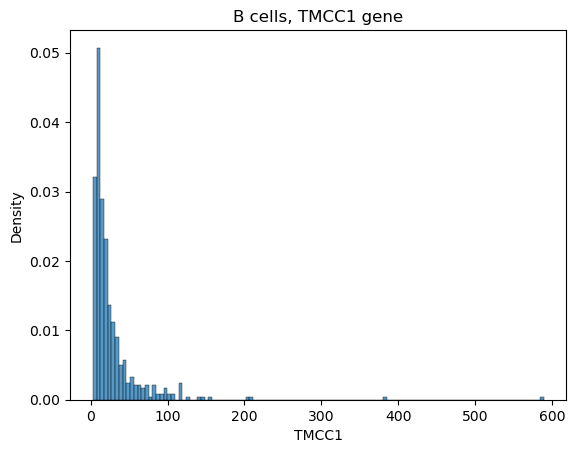

In [5]:
sns.histplot(b_cells_expression_data[example_gene], stat="density");
plt.title('B cells, TMCC1 gene');

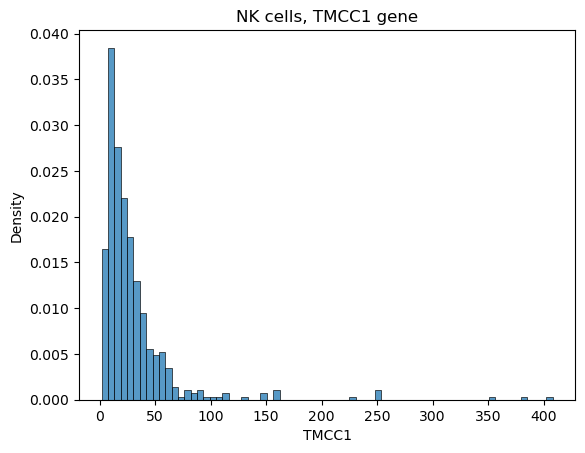

In [6]:
sns.histplot(nk_cells_expression_data[example_gene], stat="density");
plt.title('NK cells, TMCC1 gene');

<div class="alert alert-info">
    Кажется, что они немного различаются. Для начала давайте попробуем еще раз проверить центральную предельную теорему.

**Задание:**

Напишите функцию, которая будет принимать на вход экспрессии гена, семплировать из них выборки размера `sample_size`, считать среднюю экспрессию и повторять это `n_samples` раз. Примените эту функцию к экспрессиям гена `TMCC1` в обоих клеточных типах, визуализируйте их. Отличаются ли средние экспрессии данного гена у этих клеточных типов?

Сигнатура функции:

```python
def demonstrate_clt(expressions, sample_size, n_samples):
    mean_expressions = []

    return mean_expressions
```
</div>

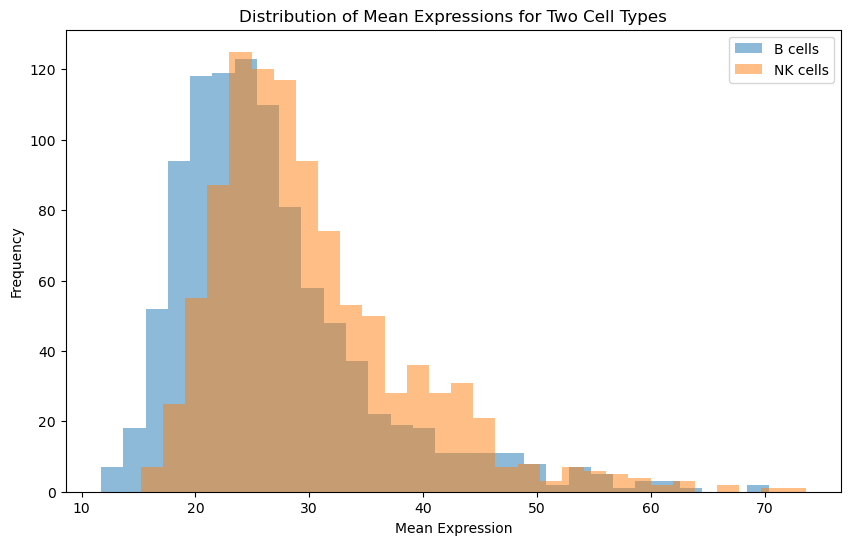

In [7]:
def demonstrate_clt(expressions, sample_size, n_samples):
    mean_expressions = []
    
    for _ in range(n_samples):
        sample = np.random.choice(expressions, size=sample_size, replace=False)
        sample_mean = np.mean(sample)
        mean_expressions.append(sample_mean)

    return mean_expressions

sample_size = 20  # Размер выборки
n_samples = 1000  # Количество семплирований

# Применяем функцию к данным для двух клеточных типов
mean_expressions_b_cells = demonstrate_clt(b_cells_expression_data[example_gene], sample_size, n_samples)
mean_expressions_nk_cells = demonstrate_clt(nk_cells_expression_data[example_gene], sample_size, n_samples)

# Визуализируем результаты
plt.figure(figsize=(10, 6))
plt.hist(mean_expressions_b_cells, bins=30, alpha=0.5, label='B cells')
plt.hist(mean_expressions_nk_cells, bins=30, alpha=0.5, label='NK cells')
plt.xlabel('Mean Expression')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Mean Expressions for Two Cell Types')
plt.show()

<div class="alert alert-info">
    А теперь посчитайте 95% доверительные интервалы для обоих распределений (примем тот факт, что средние распределены нормально для обоих клеточных типов) и скажите, отличается ли средняя экспрессия данного гена между клеточными типами?
    </div>

In [8]:
# Запишем в отдельные переменные экспрессии гена для B-клеток и NK-клеток
expressions_b_cells = np.array(b_cells_expression_data[example_gene])
expressions_nk_cells = np.array(nk_cells_expression_data[example_gene])

# Вычисляем стандартное отклонение для каждого типа клеток
sigma_b = expressions_b_cells.std()
sigma_nk = expressions_nk_cells.std()

# Вычисляем стандартные ошибки
se_b = sigma_b / np.sqrt(len(expressions_b_cells))
se_nk = sigma_nk / np.sqrt(len(expressions_nk_cells))

# Вычисляем доверительные интервалы
mean_b = expressions_b_cells.mean()
left_b = mean_b - 1.96 * se_b
right_b = mean_b + 1.96 * se_b
print(f'Доверительный интервал для B-клеток ({left_b:.3f}, {right_b:.3f})')

mean_nk = np.array(nk_cells_expression_data[example_gene]).mean()
left_nk = mean_nk - 1.96 * se_nk
right_nk = mean_nk + 1.96 * se_nk
print(f'Доверительный интервал для NK-клеток ({left_nk:.3f}, {right_nk:.3f})')

Доверительный интервал для B-клеток (23.432, 30.526)
Доверительный интервал для NK-клеток (26.858, 34.004)


In [9]:
# Выполняем t-тест
t_statistic, p_value = st.ttest_ind(expressions_b_cells, expressions_nk_cells)
print(f'p_value = {p_value:.3f}')

# Проверяем статистическую значимость
alpha = 0.05  # Уровень значимости
if p_value < alpha:
    print("Средние значения различаются (статистически значимо)")
else:
    print("Средние значения не различаются (статистически незначимо)")

p_value = 0.180
Средние значения не различаются (статистически незначимо)


## Задание 2

**4 баллов**

<div class="alert alert-info">
    Вспомнили центральную предельную теорему и то, как считать доверительные интервалы в простом случае, теперь давайте воспользуемся библиотечной реализацией для того, чтобы протестировать уже все гены.
    </div>

<div class="alert alert-info">
    Посчитаем доверительные интервалы для нашего демонстрационного гена в обоих клеточных типах:
    </div>

In [10]:
# B клетки
st.t.interval(confidence = 0.95, # 95% доверительный интервал
              df = len(b_cells_expression_data[example_gene]) - 1, # число степеней свободы - 1
              loc = np.mean(b_cells_expression_data[example_gene]), # Среднее
              scale = st.sem(b_cells_expression_data[example_gene])) # Стандартная ошибка среднего

(23.420272072079296, 30.53767158632071)

In [11]:
# NK клетки
st.t.interval(confidence = 0.95, # 95% доверительный интервал
              df=len(nk_cells_expression_data[example_gene]) - 1, # число степеней свободы - 1
              loc=np.mean(nk_cells_expression_data[example_gene]), # Среднее
              scale=st.sem(nk_cells_expression_data[example_gene])) # Стандартная ошибка среднего

(26.84610468807562, 34.01653451272438)

<div class="alert alert-info">
    Напишите функцию для проверки того, что доверительные интервалы пересекаются. На лекции мы тестировали гипотезы для равенства среднего выборки заданному числу и проверяли, попало ли оно в границы этого интервала или нет, если оно оказывалось за ними, то мы говорили, что средние отличаются. Здесь же мы имеем дело с двумя выборками, поэтому будем проверять, пересекаются ли доверительные интервалы, и, если нет, то говорить о том, что средние в выборках отличаются.

```python
def check_intervals_intersect(first_ci, second_ci):   

    return are_intersect # True or False
```
    </div>

In [12]:
def check_intervals_intersect(first_ci, second_ci):
    # Первый доверительный интервал
    ci_b_start, ci_b_end = ci_b
    # Второй доверительный интервал
    ci_nk_start, ci_nk_end = ci_nk

    # Проверяем, пересекаются ли интервалы
    if ci_b_end >= ci_nk_start and ci_nk_end >= ci_b_start:
        return True  # Интервалы пересекаются
    else:
        return False  # Интервалы не пересекаются

ci_b = st.t.interval(confidence = 0.95, # 95% доверительный интервал
              df = len(b_cells_expression_data[example_gene]) - 1, # число степеней свободы - 1
              loc = np.mean(b_cells_expression_data[example_gene]), # Среднее
              scale = st.sem(b_cells_expression_data[example_gene])) # Стандартная ошибка среднего

ci_nk = st.t.interval(confidence = 0.95, # 95% доверительный интервал
              df=len(nk_cells_expression_data[example_gene]) - 1, # число степеней свободы - 1
              loc=np.mean(nk_cells_expression_data[example_gene]), # Среднее
              scale=st.sem(nk_cells_expression_data[example_gene])) # Стандартная ошибка среднего

are_intersect = check_intervals_intersect(ci_b, ci_nk)
print(are_intersect)

True


<div class="alert alert-info">
    Теперь для каждого гена посчитайте доверительные интервалы в обоих клеточных типах, и проверьте, пересекаются ли они? Результаты можно добавлять в список, например:

```python
ci_test_results = [True, False, ..., True]
```
    </div>

In [13]:
# Запишем все гены в отдельный список
genes = expression_data.columns[:-1].tolist()

ci_test_results = []  # Список для хранения результатов

for gene in genes:
    ci_b = st.t.interval(confidence=0.95,
                         df=len(b_cells_expression_data[gene]) - 1,
                         loc=np.mean(b_cells_expression_data[gene]),
                         scale=st.sem(b_cells_expression_data[gene]))

    ci_nk = st.t.interval(confidence=0.95,
                          df=len(nk_cells_expression_data[gene]) - 1,
                          loc=np.mean(nk_cells_expression_data[gene]),
                          scale=st.sem(nk_cells_expression_data[gene]))

    are_intersect = check_intervals_intersect(ci_b, ci_nk)
    ci_test_results.append(are_intersect)


<div class="alert alert-info">
    Попытайтесь оформить это в виде функции, которая будет принимать на вход две таблицы с экспрессиями и выдавать для каждого гена, значимо ли отличается его средняя экспрессия между клеточными типами.

```python
def check_dge_with_ci(first_table, second_table):
    # dge - differential gene expression

    return ci_test_results
```
    </div>

In [14]:
def check_dge_with_ci(first_table, second_table):
    def check_intervals_intersect(ci_b, ci_nk):
        ci_b_start, ci_b_end = ci_b
        ci_nk_start, ci_nk_end = ci_nk

        if ci_b_end >= ci_nk_start and ci_nk_end >= ci_b_start:
            return True
        else:
            return False

    ci_test_results = {}  # Словарь для хранения результатов

    for gene in first_table.columns:
        ci_b = st.t.interval(confidence = 0.95,
                             df = len(first_table[gene]) - 1,
                             loc = np.mean(first_table[gene]),
                             scale = st.sem(first_table[gene]))

        ci_nk = st.t.interval(confidence = 0.95,
                              df = len(second_table[gene]) - 1,
                              loc = np.mean(second_table[gene]),
                              scale = st.sem(second_table[gene]))

        are_intersect = check_intervals_intersect(ci_b, ci_nk)
        ci_test_results[gene] = are_intersect

    return ci_test_results


## Задание 3

**4 баллов**

<div class="alert alert-info">
    Давайте теперь применим для той же задачи `z-критерий`. Будем считать, что в данном случае $\alpha$ = 0.05, и если полученное `p-value` будет меньше, то экспрессия генов значимо отличается.
    </div>

In [15]:
# Наш излюбленный ген
ztest(
    b_cells_expression_data[example_gene],
    nk_cells_expression_data[example_gene]
)

(-1.3427434041885127, 0.17935507499860204)

<div class="alert alert-info">
    Попытайтесь оформить это в виде функции, которая будет принимать на вход две таблицы с экспрессиями и выдавать для каждого гена, значимо ли отличается его средняя экспрессия между клеточными типами.

```python
def check_dge_with_ztest(first_table, second_table):
    # dge - differential gene expression

    return z_test_results
```
    </div>

In [16]:
def check_dge_with_ztest(first_table, second_table):
    # dge - differential gene expression
    
    z_test_results = []
    
    
    for gene in genes:
        z_stat, p_value = ztest(first_table[gene], second_table[gene])
        is_significant = p_value < alpha
        
        z_test_results.append(is_significant)    

    return z_test_results

z_test_results = check_dge_with_ztest(b_cells_expression_data, nk_cells_expression_data)

## Задание 4

**10 баллов**

<div class="alert alert-info">
    Теперь пришла пора оформить все ваши старания в виде программы. Напишите программу (можно просто функцию), которая принимает на вход следующие аргуметры:

1. `first_cell_type_expressions` &ndash; таблица с экспрессиями генов для одного клеточного типа;
2. `second_cell_type_expressions` &ndash; таблица с экспрессиями генов для второго клеточного типа;

Как читать данные при помощи пандаса мы уже знаем, осталось понять, как записывать результаты. Допустим, вы записывали результаты ваших тестов в списки, тогда создать пандасовский датафрейм можно следующим образом:
    </div>

In [17]:
# ci_test_results = [True, False, True]
# z_test_results = [True, True, True]
# Опционально можно также сохранять p-value для z-критерия
# z_test_p_values = [0.004, 0.01, 0.0001]
# Также сохраните разницу в средних экспрессиях между 1 и 2 таблицами для каждого гена,
# чтобы было понять, уменьшается или увеличивается экспрессия гена
# mean_diff = [-10, 10, 0.5]

# Созданим словарь {'название колонки': список_значений}
# results = {
#    "ci_test_results": ci_test_results,
#    "z_test_results": z_test_results,
#    "z_test_p_values": z_test_p_values,
#    "mean_diff": mean_diff
#}

# Из словаря делаем датафрейм
# results = pd.DataFrame(results)
# results.head()

In [18]:
# Сохраним таблицу в .csv файл
# results.to_csv("path_to_your_awesome_results.csv")

In [19]:
def check_dge_with_ztest(first_cell_type_expressions, second_cell_type_expressions):
    # dge - differential gene expression
    
    z_test_results = []
    z_test_z_statistic = []
    z_test_p_values = []
    mean_diff = []
    
    
    for gene in genes:
        z_stat, p_value = ztest(first_cell_type_expressions[gene], second_cell_type_expressions[gene])
        is_significant = p_value < alpha
        mean = np.mean(first_cell_type_expressions[gene]) - np.mean(second_cell_type_expressions[gene])
        
        z_test_results.append(is_significant)
        z_test_z_statistic.append(z_stat)
        z_test_p_values.append(p_value)
        mean_diff.append(mean)
    

    return z_test_results, z_test_z_statistic, z_test_p_values, mean_diff

z_test_results, z_test_z_statistic, z_test_p_values, mean_diff = check_dge_with_ztest(b_cells_expression_data,
                                                                                      nk_cells_expression_data)

# Создадим словарь {'название колонки': список_значений}
results = {
    "gene": genes,
    "ci_test_results": ci_test_results,
    "z_test_results": z_test_results,
    "z_test_p_values": z_test_p_values,
    "mean_diff": mean_diff
}

# Из словаря делаем датафрейм
results = pd.DataFrame(results)
results.head()

,gene,ci_test_results,z_test_results,z_test_p_values,mean_diff
0,TMCC1,True,False,0.179355,-3.452348
1,RANBP3,False,True,0.000063,-6.473981
2,GABRG3,True,False,0.704603,0.763407
3,ARRDC5,False,True,0.015754,-3.334424
4,LRP3,True,False,0.091768,2.725465


In [20]:
# Сохраним таблицу в .csv файл
results.to_csv("/home/elvira/BLASTIM_ML_ON_PYTHON/day_09/immune_cells_data_results.csv")

In [21]:
# Запишем библиотеки окружения в файл
!pip freeze --all > requirements.txt